### <u>`import` all required modules</u>

In [1]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline

### <u>Using rule-based method (Vader)</u>

In [3]:
data = pd.read_csv('../../book_reviews_sample.csv')

In [4]:
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [6]:
data['reviewText'][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

***We will not remove stopwords, or perform lemmatization or stemming, because these operations will reduce the intensity of the sentiment. example - removing 'very' will affect the sentiment.***

#### Text Cleaning

In [7]:
data['reviewText_clean'] = data['reviewText'].str.lower()

In [9]:
data['reviewText_clean'] = data.apply(lambda x: re.sub(r"[^\w\s]", '', x['reviewText_clean']), axis=1  )

In [10]:
data['vader_sentiment_score'] = data['reviewText_clean'].apply(lambda review: SentimentIntensityAnalyzer().polarity_scores(review)['compound'])

***VADER's `polarity_scores` returns a dict with keys `"neg", "neu", "pos"`, and `"compound"`***

In [16]:
polarity = data['reviewText_clean'].apply(lambda review: SentimentIntensityAnalyzer().polarity_scores(review))
polarity[0]

{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.7684}

In [17]:
data.head()

,index,reviewText,rating,reviewText_clean,vader_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


#### Creating bins using `pd.cut()`

In [18]:
bins = [-1, -0.1, 0.1, 1]
labels = ['negative', 'neutral', 'positive']
data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'], bins=bins, labels=labels)

In [19]:
data.head()

,index,reviewText,rating,reviewText_clean,vader_sentiment_score,vader_sentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative


<Axes: xlabel='vader_sentiment_label'>

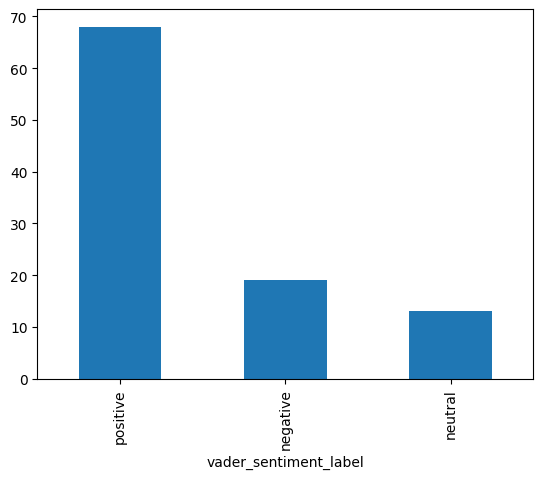

In [20]:
data['vader_sentiment_label'].value_counts().plot(kind='bar')

### <u>Using pre-trained transformer models</u>

In [21]:
tranformer_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [22]:
transformer_labels = []
for review in data['reviewText_clean']:
    sentiment = tranformer_pipeline(review)[0]
    transformer_labels.append(sentiment['label'])
data['transformer_sentiment_label'] = transformer_labels

<Axes: xlabel='transformer_sentiment_label'>

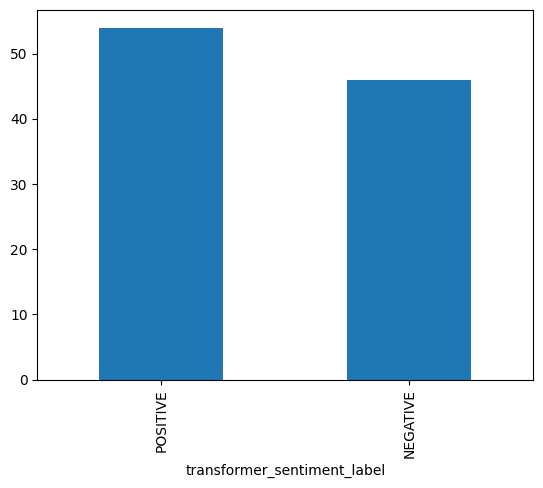

In [23]:
data['transformer_sentiment_label'].value_counts().plot(kind='bar')

#### Using a specific model from huggingface

In [25]:
specific_model = pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use mps:0


In [26]:
specific_transformer_labels = []

for review in data['reviewText_clean']:
    sentiment = specific_model(review)[0]
    specific_transformer_labels.append(sentiment['label'])

data['specific_transformer_sentiment_label'] = specific_transformer_labels

<Axes: xlabel='specific_transformer_sentiment_label'>

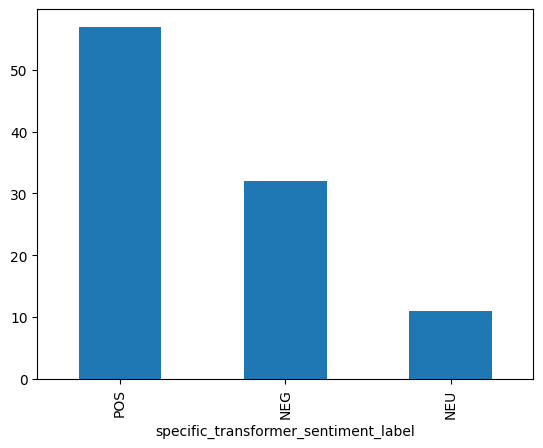

In [27]:
data['specific_transformer_sentiment_label'].value_counts().plot(kind='bar')